Iteration 0: Cost = 74070771828.90067
Current Parameters: [1.61696088e-02 4.69276106e+03 3.87847367e+03 3.87846999e+03]
Iteration 1000: Cost = 70190402694.65959
Current Parameters: [ 1.61696088e-02  1.71610168e+05 -4.15831696e+04 -4.15831733e+04]
Iteration 2000: Cost = 70190099886.36333
Current Parameters: [ 1.61696088e-02  1.73791969e+05 -4.26500470e+04 -4.26500506e+04]
Iteration 3000: Cost = 70190099815.86847
Current Parameters: [ 1.61696088e-02  1.73825258e+05 -4.26663253e+04 -4.26663290e+04]
Iteration 4000: Cost = 70190099815.85205
Current Parameters: [ 1.61696088e-02  1.73825766e+05 -4.26665737e+04 -4.26665773e+04]
Iteration 5000: Cost = 70190099815.85205
Current Parameters: [ 1.61696088e-02  1.73825774e+05 -4.26665774e+04 -4.26665811e+04]
Iteration 6000: Cost = 70190099815.85205
Current Parameters: [ 1.61696088e-02  1.73825774e+05 -4.26665775e+04 -4.26665812e+04]
Iteration 7000: Cost = 70190099815.85205
Current Parameters: [ 1.61696088e-02  1.73825774e+05 -4.26665775e+04 -4.26665

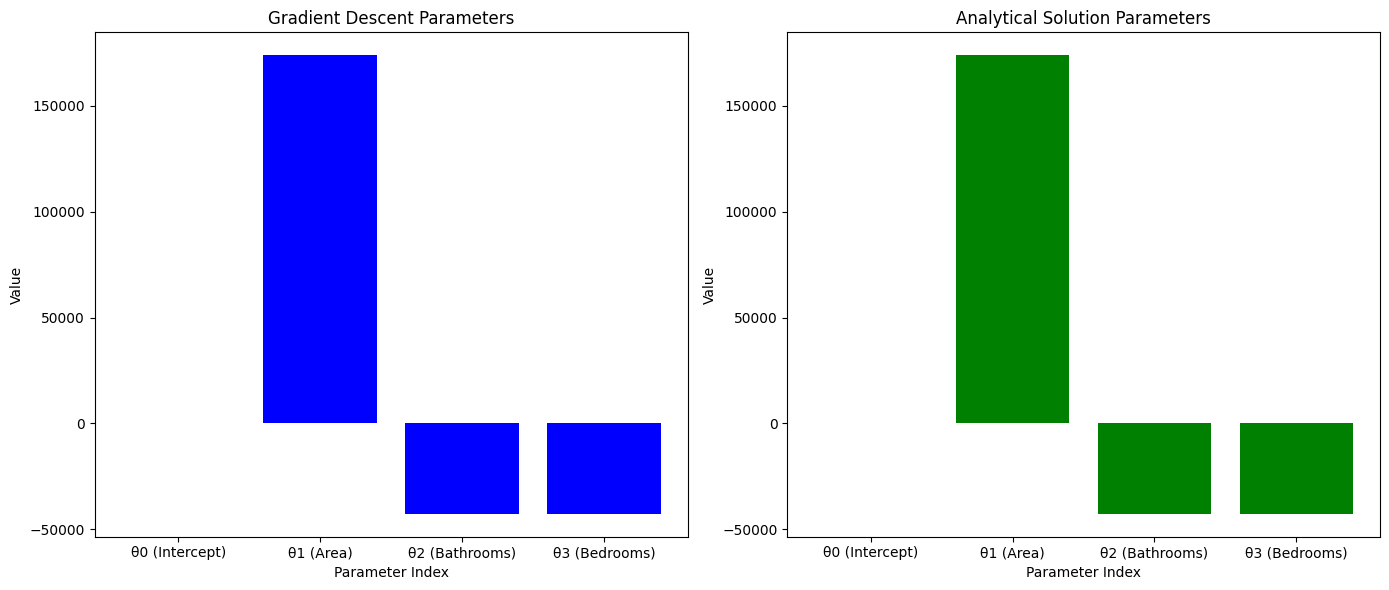

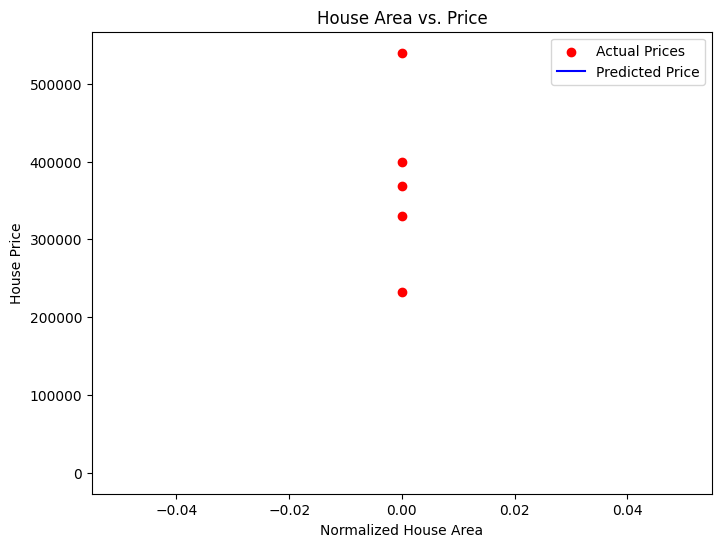

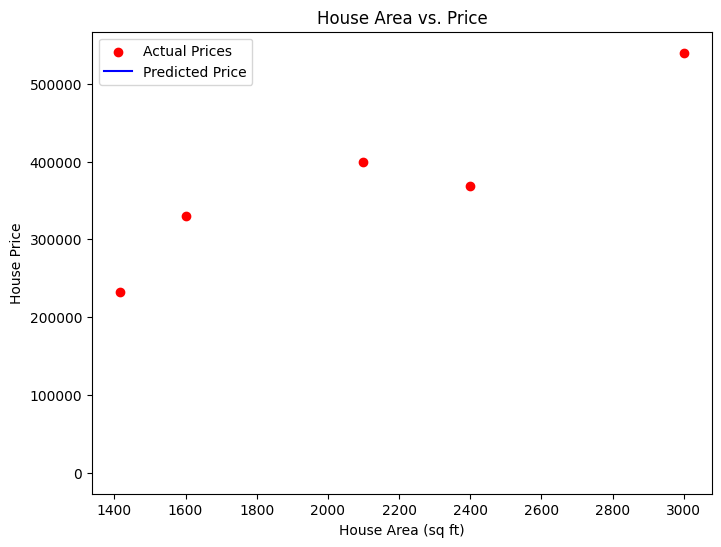

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 1. Hypothesis function in vectorized form
def hypothesis(X, theta):
    return np.dot(X, theta)
# 2. Loss function (mean squared error) in vectorized form
def compute_cost(X, y, theta):
    m = len(y)
    prediction = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((prediction - y) ** 2)
    return cost
# 3. Gradient descent step
def gradient_step(X, y, theta, learning_rate):
    m = len(y)
    prediction = hypothesis(X, theta)
    gradient = (1 / m) * np.dot(X.T, (prediction - y))
    theta = theta - learning_rate * gradient
    return theta
# 4. Finding optimal parameters using gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        theta = gradient_step(X, y, theta, learning_rate)
        if i % 1000 == 0: 
            cost = compute_cost(X, y, theta)
            cost_history.append(cost)
            print(f"Iteration {i}: Cost = {cost}")
            print(f"Current Parameters: {theta}")
    return theta, cost_history
# 5. Analytical solution with regularization (Ridge Regression)
def analytical_solution(X, y, alpha=1e-5):
    n = X.shape[1]
    I = np.eye(n) 
    return np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y
# 6. Normalize data with protection against division by zero
def normalize(X):
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    std_dev[std_dev == 0] = 1 
    return (X - mean) / std_dev
# 7. Compare results from both methods
def compare_results(X, y):
    # Normalize the feature matrix
    X_normalized = normalize(X)
    
    # Initializing parameters (with bias term)
    theta_init = np.random.randn(X_normalized.shape[1]) * 0.01  # Random small values for initialization
    
    # Finding parameters using gradient descent
    theta_gd, cost_history = gradient_descent(X_normalized, y, theta_init, learning_rate=0.05, iterations=10000)
    
    # Finding parameters using the analytical solution
    theta_analytical = analytical_solution(X_normalized, y)
    
    print("\nGradient Descent Parameters:", theta_gd)
    print("Analytical Solution Parameters:", theta_analytical)
    
    # Plotting the parameters for comparison
    plt.figure(figsize=(14, 6))
    
    # Plot gradient descent parameters
    plt.subplot(1, 2, 1)
    indices = np.arange(len(theta_gd))
    plt.bar(indices, theta_gd, color='blue')
    plt.title("Gradient Descent Parameters")
    plt.xlabel("Parameter Index")
    plt.ylabel("Value")
    plt.xticks(indices, ['θ0 (Intercept)', 'θ1 (Area)', 'θ2 (Bathrooms)', 'θ3 (Bedrooms)'])
    
    # Plot analytical solution parameters
    plt.subplot(1, 2, 2)
    indices = np.arange(len(theta_analytical))
    plt.bar(indices, theta_analytical, color='green')
    plt.title("Analytical Solution Parameters")
    plt.xlabel("Parameter Index")
    plt.ylabel("Value")
    plt.xticks(indices, ['θ0 (Intercept)', 'θ1 (Area)', 'θ2 (Bathrooms)', 'θ3 (Bedrooms)'])
    
    plt.tight_layout()
    plt.show()
    
    # Additional Visualization: House Area vs. Price
    # For visualization, we'll plot the relationship between House Area and Price while fixing other features
    # We'll use the parameters from the analytical solution for simplicity
    theta = theta_analytical
    
    # Extract the mean values of other features to fix them
    # Excluding the intercept term
    X_features = X_normalized[:, 1:]
    mean_bathrooms = np.mean(X_features[:, 1])  # θ2: Bathrooms
    mean_bedrooms = np.mean(X_features[:, 2])   # θ3: Bedrooms
    
    # Create a range of house areas
    area_min = X_normalized[:, 0].min()
    area_max = X_normalized[:, 0].max()
    area_range = np.linspace(area_min, area_max, 100)
    
    # Create feature matrix for prediction
    # [1, area, mean_bathrooms, mean_bedrooms]
    X_plot = np.vstack([
        np.ones_like(area_range),
        area_range,
        np.full_like(area_range, mean_bathrooms),
        np.full_like(area_range, mean_bedrooms)
    ]).T
    
    # Predict prices
    predicted_prices = hypothesis(X_plot, theta)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X_normalized[:, 0], y, color='red', label='Actual Prices')
    plt.plot(area_range, predicted_prices, color='blue', label='Predicted Price')
    plt.title('House Area vs. Price')
    plt.xlabel('Normalized House Area')
    plt.ylabel('House Price')
    plt.legend()
    plt.show()
    
    # Alternatively, if you want to plot with original (unnormalized) house area:
    # First, retrieve normalization parameters
    mean = np.mean(X[:, 1], axis=0)
    std_dev = np.std(X[:, 1], axis=0)
    
    area_original = area_range * std_dev + mean
    predicted_prices_original = predicted_prices  # Since y is not normalized
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 1], y, color='red', label='Actual Prices')
    plt.plot(area_original, predicted_prices_original, color='blue', label='Predicted Price')
    plt.title('House Area vs. Price')
    plt.xlabel('House Area (sq ft)')
    plt.ylabel('House Price')
    plt.legend()
    plt.show()
# Sample data: area (sq ft), number of bathrooms, number of bedrooms
X = np.array([[2100, 3, 4],
              [1600, 2, 3],
              [2400, 4, 5],
              [1416, 2, 3],
              [3000, 4, 5]])
# Add a column of ones for the intercept term (bias)
X = np.c_[np.ones(X.shape[0]), X]
# House prices (target values)
y = np.array([400000, 330000, 369000, 232000, 539900])
# Compare the results of both methods
compare_results(X, y)